# Read and Explore Data

In [1]:
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Version info.: sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
pandas version: 1.4.4
numpy version: 1.23.5
skearn version: 1.2.2
re version: 2.2.1
nltk version: 3.7


# Read Data

In [2]:
# read the csv file
train_df = pd.read_csv(r'C:\Users\Pokie\Documents\Grad_School\273P_ML_Project\train.csv')
display(train_df.shape, train_df.head())

(159571, 8)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Data Exploration
Checking how many comments are classified in the train.csv file

In [3]:
df = train_df.copy()
categorywise_data = df.drop(['id', 'comment_text'], axis=1)     
### Removed unnecessary columns - id and comment_text
counts_category = []                                               
### A list that contains tuple which consists of class label and number of comments for that particular class 
categories = list(categorywise_data.columns.values)
for i in categories:
    counts_category.append((i, categorywise_data[i].sum()))
    
df = pd.DataFrame(counts_category, columns=['Labels', 'number_of_comments'])

Text(0.5, 0, 'Labels')

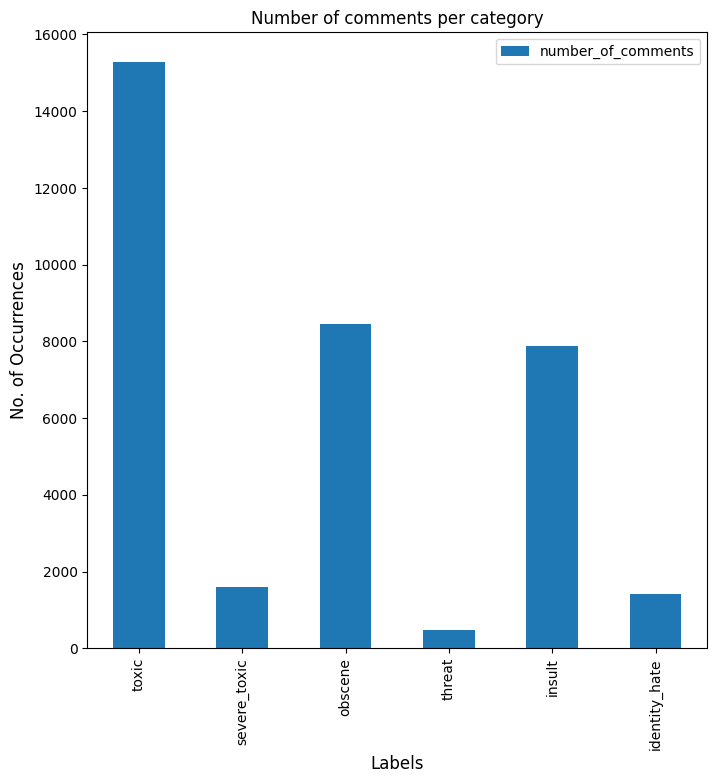

In [4]:
df.plot(x='Labels', y='number_of_comments', kind='bar',figsize=(8,8))
plt.title("Number of comments per category")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Labels', fontsize=12)

# Clean Data


### 1. Remove Capitalization

Because of the variety of capitalization used to construct a sentence, capitalization or lower case is the strategy used in text cleaning most frequently. With this method, every word in the text and document will be projected into the same feature area. If mistakes, slang, acronyms, or informal abbreviations were to be replaced, the issue would only arise in rare instances like the USA or the UK.

In [5]:
train_df["text_clean"] = train_df["comment_text"].apply(lambda x: x.lower())
display(train_df.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


### 2.Expanding Contractions

Example of contraction: We'll -> We will, or we shoudn't've -> we should not have. By using Contractions package to expand contractions in English

In [6]:
#!pip install contractions

In [7]:
import contractions

# Test
test_text = """
            Y'all can't expand contractions I'd think. I'd like to know how I'd done that! 
            We're going to the zoo and I don't think I'll be home for dinner.
            Theyre going to the zoo and she'll be home for dinner.
            We should've do it in here but we shouldn't've eat it
            """
print("Test: ", contractions.fix(test_text))

train_df["text_clean"] = train_df["text_clean"].apply(lambda x: contractions.fix(x))

Test:  
            You all cannot expand contractions I would think. I would like to know how I would done that! 
            We are going to the zoo and I do not think I will be home for dinner.
            They Are going to the zoo and she will be home for dinner.
            We should have do it in here but we should not have eat it
            


In [8]:
print(train_df["comment_text"][12]) #notice gang ip, wp
print(train_df["text_clean"][12])

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
hey... what is it..
@ | talk .
what is it... an exclusive group of some wp talibans...who are good at destroying, self-appointed purist who gang up any one who asks them questions about their anti-social and destructive (non)-contribution at wp?

ask sityush to clean up his behavior than issue me nonsensical warnings...


### 3. Noise Removal

Removing unnecessary characters or punctuation such as URLs, HTML tags, non-ASCII characters (American Standard Code for Information Interchange), or other special characters (symbols, emojis, and other grahic characters)

#### 3.1 Remove URL

In [9]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [10]:
# remove urls from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_URL(x))

# double check
print(train_df["comment_text"][101])
print(train_df["text_clean"][101])

Check the following websites:

http://www.iranchamber.com/personalities/farabi/farabi.php
http://www.islam.org.br/%C2%A0al_farabi.htm
http://www.superbeyin.com/sohbet/sohbet.htm
check the following websites:






In [11]:
print(train_df["comment_text"][91]) #notice the url
print(train_df["text_clean"][91])

Transliteration of Russian place names
In writing about Moscow Metro for the Malayalam Wikipedia, we are finding it difficult to correctly transliterate the Russian place names. For example, do we pronounce Park Kultury as PAARK KALTTARI or PAARK KALCHCHARI (or perhaps something completely different)? Can somebody please help by transliterating the list given in https://ml.wikipedia.org/wiki/സംവാദം:മോസ്കോ_മെട്രോ. (I am not putting the list here as I don't want to clutter up this page.) Thanks
transliteration of russian place names
in writing about moscow metro for the malayalam wikipedia, we are finding it difficult to correctly transliterate the russian place names. for example, do we pronounce park kultury as paark kalttari or paark kalchchari (or perhaps something completely different)? can somebody please help by transliterating the list given in  (i am not putting the list here as i do not want to clutter up this page.) thanks


#### 3.2 Remove HTML Tags

In [12]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [13]:
# remove html from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_html(x))

# double check
print(train_df["comment_text"][117]) #notice the url is gone
print(train_df["text_clean"][117])

Also see this if you cant trust Murkoth Ramunni
http://books.google.com/books?id=HHev0U1GfpEC&pg;=PA51&dq;=Thiyya+matrilineal&hl;=en&sa;=X&ei;=TlpPUd2aH8mWiQLgvIDgBA&ved;=0CDYQ6AEwAQ#v=onepage&q;=Thiyya%20matrilineal&f;=false
also see this if you cannot trust murkoth ramunni



#### 3.3 Remove Non-ASCII

In [14]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) 
# or ''.join([x for x in text if x in string.printable]) 

In [15]:
# remove non-ascii characters from the text
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_non_ascii(x))

# double che
print(train_df["comment_text"][6011]) #notice Côte on the 2nd line
print(train_df["text_clean"][6011])

"
No, we don't.  The name ""Ivory Coast"" contains only English-alphabet letters, and it would sort just fine in almost all cases where ""Côte d'Ivoire"" remains missorted, often appearing after Croatia, after Cyprus, after Czech Republic.  You can see this by looking at Category:Communications by country and seeing where the subcategory Category:Communications in Côte d'Ivoire is missorted (even though the sorting of the article of the same name has been fixed—can you see the difference in order?).  Or you can see it by looking at Category:Nations at the 2004 Summer Olympics and seeing where the article Côte d'Ivoire at the 2004 Summer Olympics is missorted.
There are hundreds of those problems out there.  Why don't you make yourself useful, and go fix some of them?   

"
"
no, we do not.  the name ""ivory coast"" contains only english-alphabet letters, and it would sort just fine in almost all cases where ""cte d'ivoire"" remains missorted, often appearing after croatia, after cyprus

In [16]:
print(train_df["comment_text"][7814]) #notice eôs
print(train_df["text_clean"][7814])

amazons, after all
I think I found the source of the connection of the labrys with the amazons: sagaris 

 saga^ris , eôs Ion. ios, hê; pl. sagareis Ion. -i_s:a weapon used by the Scythian tribes, Hdt.1.215, 4.5;

 A. axinas sagaris eichon Id.7.64 ; by the Amazons, Aristarch. in 
 PAmh.2.12 ii 10; by the Persians, Amazons, Mossynoeci, etc., 
 X.An.4.4.16, 5.4.13:acc. to Hsch. single-edged, and joined by 
 X. with kopis and machaira, Cyr. 1.2.9, 2.1.9, 4.2.22; 
 double-edged acc. to AP6.94 (Phil.).

i.e. an axe-like weapon, sometimes described as single-edged, and sometimes as double-edged. This shouild probably be put in a Sagaris article.
amazons, after all
i think i found the source of the connection of the labrys with the amazons: sagaris 

 saga^ris , es ion. ios, h; pl. sagareis ion. -i_s:a weapon used by the scythian tribes, hdt.1.215, 4.5;

 a. axinas sagaris eichon id.7.64 ; by the amazons, aristarch. in 
 pamh.2.12 ii 10; by the persians, amazons, mossynoeci, etc., 
 x.an.4.4.

#### 3.4 Remove Special Characters

Special characters could be symbols, emojis, and other graphic characters. 

In [17]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_special_characters(x))

In [19]:
# double check
print(train_df["comment_text"][143]) #notice the telephone
print(train_df["text_clean"][143])

"P.S. It's not polite to talk to people behind their backs, please remove your comments from Mrph's talk page.

Vaughan
You're right; I went to check your previous edit and found a page on the Marvel site that spelled it ""Vaughn"", but now I am finding many more that spell it correctly. Thanks for the edits.   (☎☓) 

"
"p.s. it is not polite to talk to people behind their backs, please remove your comments from mrph's talk page.

vaughan
you are right; i went to check your previous edit and found a page on the marvel site that spelled it ""vaughn"", but now i am finding many more that spell it correctly. thanks for the edits.   () 

"


In [20]:
print(train_df["comment_text"][189]) #notice the heart
print(train_df["text_clean"][189])

"

Sorry to interrupt but I'm at 1200 edits now... the first 200 were likely just on my own pages and because I was asking for help so much so maybe just 1000... or maybe less... but it still kind of counts. ♥♥Amulet♥♥ "
"

sorry to interrupt but i am at 1200 edits now... the first 200 were likely just on my own pages and because i was asking for help so much so maybe just 1000... or maybe less... but it still kind of counts. amulet "


#### 3.5 Remove Punctuations

In [21]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: remove_punct(x))

# double check
print(train_df["comment_text"][3])
print(train_df["text_clean"][3])

"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "

more
i cannot make any real suggestions on improvement  i wondered if the section statistics should be later on or a subsection of types of accidents  i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first  if you have any preferences for formatting style on references or want 

In [23]:
print(train_df["comment_text"][7595])
print(train_df["text_clean"][7595])

"

I don't see a problem with citing GAO/HRD-87-46 and the pdf linked there. The ""internal FDA documents"" sound like they are by definition not published.  Talk "


i do not see a problem with citing gaohrd8746 and the pdf linked there the internal fda documents sound like they are by definition not published  talk 


#### 3.6 Other Manual Text Cleaning Tasks

- Replace Unicode characters with equivalent ASCII character (instead of removing)
- Replace the entity references with their actual symbols instead of removing as HTML tags
- Replace the Typos, slang, acronyms or informal abbreviations - depends on diffrent situations or main topics of the NLP such as finance or medical topics. 
- List out all the hashtags/ usernames then replace with equivalent words. 
- Replace the emoticon/ emoji with equivalent word meaning such as ":)" with "smile" 
- Spelling correction

In [24]:
def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [25]:
train_df["text_clean"] = train_df["text_clean"].apply(lambda x: other_clean(x))

In [26]:
# double check
print(train_df["comment_text"][10875]) #notice omg
print(train_df["text_clean"][10875])

"   Please refrain from creating inappropriate pages such as OMG LIEK TOTALLY. It is considered vandalism. If you would like to experiment, use the sandbox.  , Recent changes patrol"
   please refrain from creating inappropriate pages such as oh my god liek totally it is considered vandalism if you would like to experiment use the sandbox   recent changes patrol


In [27]:
print(train_df["comment_text"][20296]) #notice lmao
print(train_df["text_clean"][20296])

Poor Walty is blocked ( LMAO knew it would happen someday.
poor walty is blocked  laugh my ass off knew it would happen someday


#### 3.7 Spelling Correction (optional)

Social media text data are usually typos or mistyped. 
Time required to fix spelling for entire dataset
potential may take days.

In [28]:
#from textblob import TextBlob
#print("Test: ", TextBlob("sleapy and tehre is no plaxe I'm gioong to.").correct())

In [29]:
#train_df['text_clean'] = train_df['text_clean'].apply(lambda x: TextBlob(x).correct())

In [30]:
# double check
#print(train_df["comment_text"][10875]) #notice liek is fixed to like 
#print(train_df["text_clean"][10875])

# Text Preprocessing:

### 1. Tokenization
Tokenization is a common technique that split a sentence into tokens, where a token could be characters, words, phrases, symbols, or other meaningful elements. By breaking sentences into smaller chunks, that would help to investigate the words in a sentence and also the subsequent steps in the NLP pipeline, such as stemming.

In [31]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize
nltk.download('punkt')

train_df['tokenized'] = train_df['text_clean'].apply(word_tokenize)
train_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pokie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokenized
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"[daww, he, matches, this, background, colour, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"[hey, man, i, am, really, not, trying, to, edi..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cannot make any real suggestions on ...,"[more, i, can, not, make, any, real, suggestio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re..."


### 2. Remove Stop Words (or/and Frequent words/ Rare words):
Stop words are common words in any language that occur with a high frequency but do not deliver meaningful information for the whole sentence. For example, {“a”, “about”, “above”, “across”, “after”, “afterward”, “again”, ...} can be considered as stop words

In [32]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
train_df['stopwords_removed'] = train_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
train_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pokie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokenized,stopwords_removed
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, seemingly,..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"[hey, man, i, am, really, not, trying, to, edi...","[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cannot make any real suggestions on ...,"[more, i, can, not, make, any, real, suggestio...","[make, real, suggestions, improvement, wondere..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page]"


### 3. Stemming
Stemming is a process of extracting a root word - identifying a common stem among various forms (e.g., singular and plural noun form) of a word, for example, the words "gardening", "gardener" or "gardens" share the same stem, garden. Stemming uproots suffixes from words to merge words with similar meanings under their standard stem.

There are three major stemming algorithms in use nowadays:

- Porter - PorterStemmer()): This stemming algorithm is an older one. It’s from the 1980s and its main concern is removing the common endings to words so that they can be resolved to a common form. It’s not too complex and development on it is frozen. Typically, it’s a nice starting basic stemmer, but it’s not really advised to use it for any production/complex application. Instead, it has its place in research as a nice, basic stemming algorithm that can guarantee reproducibility. It also is a very gentle stemming algorithm when compared to others.

- Snowball - LancasterStemmer(): This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer. That being said, it is also more aggressive than the Porter stemmer. A lot of the things added to the Snowball stemmer were because of issues noticed with the Porter stemmer. There is about a 5% difference in the way that Snowball stems versus Porter.

- Lancaster - SnowballStemmer(): Just for fun, the Lancaster stemming algorithm is another algorithm that you can use. This one is the most aggressive stemming algorithm of the bunch. However, if you use the stemmer in NLTK, you can add your own custom rules to this algorithm very easily. It’s a good choice for that. One complaint around this stemming algorithm though is that it sometimes is overly aggressive and can really transform words into strange stems. Just make sure it does what you want it to before you go with this option!

#### Snowball 
The Stemming Algorithm that our group is using for data Processing

In [33]:
from nltk.stem import SnowballStemmer

def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems

In [34]:
train_df['snowball_stemmer'] = train_df['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text_clean,tokenized,stopwords_removed,snowball_stemmer
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,...","[explan, edit, made, usernam, hardcor, metalli..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour i am se...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, seemingly,...","[daww, match, background, colour, seem, stuck,..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man i am really not trying to edit war it ...,"[hey, man, i, am, really, not, trying, to, edi...","[hey, man, really, trying, edit, war, guy, con...","[hey, man, realli, tri, edit, war, guy, consta..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cannot make any real suggestions on ...,"[more, i, can, not, make, any, real, suggestio...","[make, real, suggestions, improvement, wondere...","[make, real, suggest, improv, wonder, section,..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page]","[sir, hero, chanc, rememb, page]"


In [35]:
data = train_df.loc[train_df['id'] == '0109e81b7ab2b70e']

In [36]:
text = data['snowball_stemmer']

with pd.option_context('display.max_colwidth', None):
    display(text)

416    [bulgar, oh, god, admin, protect, peopl, vandalis, bulgar, articl, attack, panslav, ultranationalist, want, see, word, begin, turk, help, remov, reliabl, sourc, old, bulgar, chang, slav, hand, great]
Name: snowball_stemmer, dtype: object

## RNN Model

In [37]:
#Note: NEED to Install Tensorflow and Keras to run this Segment
#Brenda, Linh NO JUDGING ME
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping


In [38]:
#Setting up the Hyperparameters
MAX_FEATURES = 15000
MAX_TEXT_LENGTH = 200 #due to word reduction from text normalization
BATCH_SIZE = 32
EPOCHS = 8
CLASSES_LIST = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]


In [39]:
#Isolating the Preprocessed Data from train_df
train_X = train_df['snowball_stemmer']
#Merging 6 columns into 1
y = train_df[CLASSES_LIST].values

In [40]:
train_X.head()

0    [explan, edit, made, usernam, hardcor, metalli...
1    [daww, match, background, colour, seem, stuck,...
2    [hey, man, realli, tri, edit, war, guy, consta...
3    [make, real, suggest, improv, wonder, section,...
4                     [sir, hero, chanc, rememb, page]
Name: snowball_stemmer, dtype: object

In [41]:
#CHecking the typings
type(train_X), type(y)

(pandas.core.series.Series, numpy.ndarray)

In [42]:
#Tokenizing the words into numbers
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(list(train_X))
list_tokenized_train = tokenizer.texts_to_sequences(train_X)

In [43]:
print(list_tokenized_train[:1])

[[491, 3, 69, 530, 3500, 8049, 743, 67, 62, 4545, 2154, 453, 61, 928, 7926, 2166, 10, 28, 234, 7, 2, 78, 1788]]


In [44]:
#pads the sequences to all be the same array length
train_X = pad_sequences(list_tokenized_train, maxlen=MAX_TEXT_LENGTH)
train_X

array([[   0,    0,    0, ...,    2,   78, 1788],
       [   0,    0,    0, ...,  109,   73,   12],
       [   0,    0,    0, ...,  610,   96,  394],
       ...,
       [   0,    0,    0, ..., 2197, 8680, 3031],
       [   0,    0,    0, ...,  240,   11,   34],
       [   0,    0,    0, ...,  266,   39, 1133]])

In [45]:
#MODEL ESTABLISHED
embed_size = 128

inp = Input(shape=(MAX_TEXT_LENGTH, ))
x = Embedding(MAX_FEATURES, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

# embed_size = 128
# inp = Input(shape=(MAX_TEXT_LENGTH, ))
# main = Embedding(MAX_FEATURES, embed_size)(inp)
# main = LSTM(60, return_sequences=True, name='lstm_layer')(main)
# main = GlobalMaxPool1D()(main)
# main = Dropout(.1)(main)
# main = Dense(50, activation="relu")(main)
# main = Dropout(.1)(main)
# main = Dense(6, activation="sigmoid")(main)
# model = Model(inputs=inp, outputs=main)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [46]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [47]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=2)
history = model.fit(train_X,y, batch_size=BATCH_SIZE, epochs=EPOCHS, 
                    validation_split=0.2, verbose =1, callbacks=[early])
#validation split was .1

Epoch 1/8
3990/3990 [==============================] - 341s 85ms/step - loss: 0.0744 - accuracy: 0.9376 - val_loss: 0.0516 - val_accuracy: 0.9941
Epoch 2/8
3990/3990 [==============================] - 334s 84ms/step - loss: 0.0471 - accuracy: 0.9910 - val_loss: 0.0494 - val_accuracy: 0.9931
Epoch 3/8
3990/3990 [==============================] - 336s 84ms/step - loss: 0.0414 - accuracy: 0.9889 - val_loss: 0.0513 - val_accuracy: 0.9940
Epoch 4/8
3990/3990 [==============================] - 341s 85ms/step - loss: 0.0370 - accuracy: 0.9811 - val_loss: 0.0505 - val_accuracy: 0.9909


In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          1920000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

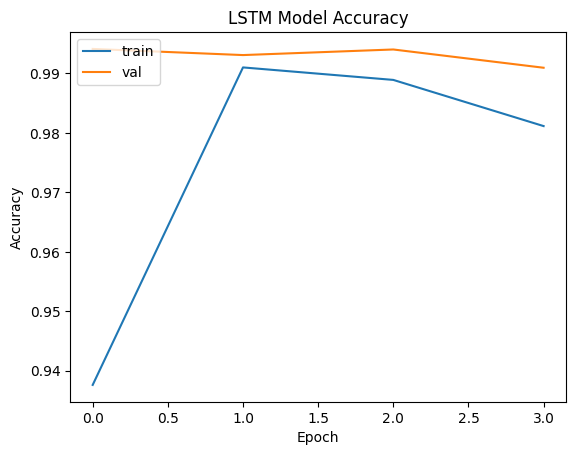

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()


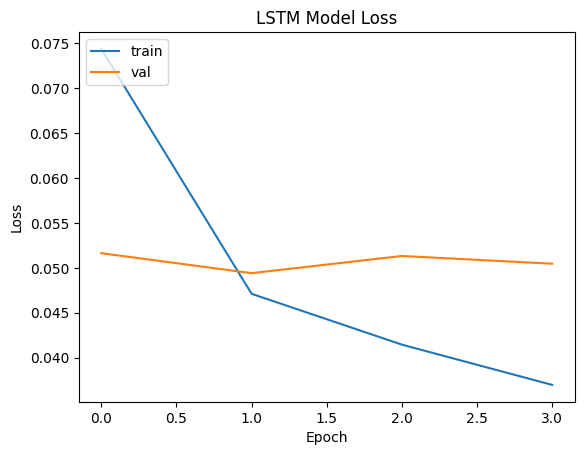

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Test Data
Setting up the data to evaluate it

In [51]:
test_df = pd.read_csv(r'C:\Users\Pokie\Documents\Grad_School\273P_ML_Project\cleanedtest.csv')
display(test_df.shape, test_df.head())
#score = model.evaluate(x_test, y_test, batch_size=batch_size)

(153164, 7)

,id,comment_text,text_clean,tokenized,stopwords_removed,snowball_stemmer,lancaster_stemmer
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...,"['yo', 'bitch', 'ja', 'rule', 'is', 'more', 's...","['yo', 'bitch', 'ja', 'rule', 'succesful', 'ev...","['yo', 'bitch', 'ja', 'rule', 'succes', 'ever'...","['yo', 'bitch', 'ja', 'rul', 'succes', 'ev', '..."
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc \n\n the title is fine as it is i a...,"['from', 'rfc', 'the', 'title', 'is', 'fine', ...","['rfc', 'title', 'fine', 'going']","['rfc', 'titl', 'fine', 'go']","['rfc', 'titl', 'fin', 'going']"
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",\n\n sources \n\n zawe ashton on lapland,"['sources', 'zawe', 'ashton', 'on', 'lapland']","['sources', 'zawe', 'ashton', 'lapland']","['sourc', 'zaw', 'ashton', 'lapland']","['sourc', 'zaw', 'ashton', 'lapland']"
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...,"['if', 'you', 'have', 'a', 'look', 'back', 'at...","['look', 'back', 'source', 'information', 'upd...","['look', 'back', 'sourc', 'inform', 'updat', '...","['look', 'back', 'sourc', 'inform', 'upd', 'co..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all,"['i', 'do', 'not', 'anonymously', 'edit', 'art...","['anonymously', 'edit', 'articles']","['anonym', 'edit', 'articl']","['anonym', 'edit', 'artic']"


In [52]:
test = test_df['snowball_stemmer']

tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(list(test))
list_tokenized_test = tokenizer.texts_to_sequences(test)

In [53]:
tester = pad_sequences(list_tokenized_test, maxlen=MAX_TEXT_LENGTH)
tester

array([[   0,    0,    0, ...,   72,  387,   14],
       [   0,    0,    0, ...,  204,  525,   21],
       [   0,    0,    0, ...,    0,   12, 8764],
       ...,
       [   0,    0,    0, ..., 4119,  396,  384],
       [   0,    0,    0, ...,   36, 4838, 2901],
       [   0,    0,    0, ...,  217,   49, 3780]])

In [54]:
test_predict = model.predict(tester)

4787/4787 [==============================] - 102s 21ms/step


In [55]:
print("Predicted values are",test_predict)

Predicted values are [[1.13081075e-02 8.60916316e-06 1.27857365e-03 4.87625039e-05
  1.38683966e-03 4.62963595e-04]
 [3.01300385e-03 2.03234740e-05 5.94534329e-04 1.91928077e-04
  7.57309550e-04 4.91398852e-04]
 [5.17936144e-03 2.51471429e-05 1.13861985e-03 1.65254285e-04
  1.26883865e-03 4.92100546e-04]
 ...
 [8.61127734e-01 9.25664678e-02 7.08711565e-01 8.04001242e-02
  5.91000140e-01 2.09497526e-01]
 [2.49654040e-01 3.59590049e-04 7.35088363e-02 6.49845926e-04
  4.10194546e-02 3.55376024e-03]
 [1.18638471e-01 3.59649886e-04 5.85377496e-03 4.47898731e-03
  1.73517931e-02 2.10378822e-02]]


In [57]:
target_cols = np.array(CLASSES_LIST)
final_predict_test = pd.concat([pd.DataFrame(test_predict,
                                             columns=target_cols)], 1)
t1 = test_df['id']
final_predict_test = pd.concat([t1,final_predict_test],1)
final_predict_test.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.011308,0.000009,0.001279,0.000049,0.001387,0.000463
1,0000247867823ef7,0.003013,0.000020,0.000595,0.000192,0.000757,0.000491
2,00013b17ad220c46,0.005179,0.000025,0.001139,0.000165,0.001269,0.000492
3,00017563c3f7919a,0.060057,0.000052,0.004471,0.000231,0.010639,0.001328
4,00017695ad8997eb,0.699901,0.002005,0.050375,0.003908,0.360571,0.006593
